https://www.kaggle.com/c/competitive-data-science-final-project

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline 

import utility.utility as ut
from preprocessing.createSets import *
from preprocessing.Sets import Sets


########### switches ################################

saveName='Oct11-2018_1'
saveFolder = saveName
saveplots=False
createSubmit = False
if not os.path.exists(saveFolder) and (saveplots or createSubmit): 
    print 'creating folder:',os.getcwd()+'/'+saveFolder
    os.mkdir(saveFolder)
if(saveplots): print "SAVING PLOTS!"
if(createSubmit): print "WILL CREATE SUBMIT FILE!"


############# Options/Args #########################

#columns to keep
col_to_keep = ['shop_id',
               'item_id',
               #'item_price',
               'item_category_id',
               'item_cnt_day',
              ]

groupby_list = ['shop_id','item_id']

agg_dict = {
            #'item_price':'mean',
            'item_category_id':'mean',
            'item_cnt_day':'sum',
            }

agg_targ = {'item_cnt_day':'sum'}

col_targets=['shop_item_cnt_month',
             'shop_cnt_month',
             'item_cnt_month',
             'shop_item_cnt_month_diff(0-1)',
             'shop_cnt_month_diff(0-1)',
             'item_cnt_month_diff(0-1)']

target = 'shop_item_cnt_month'
# target = 'shop_item_cnt_month_diff(0-1)'

opt = {'lag_length':3,
            'diff':True,
            'diffRel':False,
            'item_cat_count_feat':False,
            'target':target,
            'col_to_keep':col_to_keep,
            'groupby_list':groupby_list,
            'agg_dict':agg_dict,
            'agg_targ':agg_targ,
            'col_targets':col_targets,            
            } 
    
clipTarget = True
lowerClip = 0
upperClip = 20
if target=='shop_item_cnt_month_diff(0-1)':
    lowerClip = -20
    upperClip = 20    

########################################################


# create train/val/test set

In [2]:
Sets = Sets(**opt)

dup_ids = Sets.checkDuplicates()
Sets.convertDatetime()
Sets.addItemCategoryId()
Sets.addYMcolumn()

lag_length: 3
diff: True
diffRel: False
item_cat_count_feat : False
target: shop_item_cnt_month

Checking for duplicates in sales_train

Found 6 duplicates in sales_train : [  76962 1435367 1496766 1671873 1866340 2198566]
Kept first, removed duplicates

Checking for duplicates in test
Found no duplicates in test

Format 'date' to 'datetime' in sales_train

Add new column: 'item_category_id' to sales_train

Add new column: years, month, Y_M to sales_train


In [3]:
Sets.splitDataByYear()


Splitting sales_train to sales_train_2013, sales_train_2014, and sales_train_2015.


In [4]:
data = Sets.getData()
data.keys()


Retrieving latest (preprocessed) data


['sales_2013',
 'sales_2014',
 'sales_2015',
 'items',
 'test',
 'sales_train',
 'shops',
 'item_categories']

In [5]:
data['sales_train'].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
1972631,2014-09-01,20,54,0,58.0,1.0,40,2014,9,2014_9
2069405,2014-10-20,21,55,1,4490.0,1.0,76,2014,10,2014_10
1552547,2014-04-04,15,55,1,4490.0,1.0,76,2014,4,2014_4
1815466,2014-07-06,18,55,1,4490.0,1.0,76,2014,7,2014_7
1906676,2014-08-04,19,55,1,4490.0,1.0,76,2014,8,2014_8


# Back to creating Price feature

## checking for range of prices

Fix / Remove outliers / missing values

In [6]:
train = data['sales_train']

In [7]:
train[train.item_price==train.item_price.min()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
484682,2013-05-15,4,32,2973,-1.0,1.0,19,2013,5,2013_5


In [8]:
train[train.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
484682,2013-05-15,4,32,2973,-1.0,1.0,19,2013,5,2013_5


In [9]:
train[(train['item_id']==2973) & (train['shop_id']==32)].sort_values(by='date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
67433,2013-01-15,0,32,2973,2499.0,3.0,19,2013,1,2013_1
67432,2013-01-17,0,32,2973,2499.0,1.0,19,2013,1,2013_1
67431,2013-01-18,0,32,2973,2499.0,1.0,19,2013,1,2013_1
67430,2013-01-21,0,32,2973,2499.0,1.0,19,2013,1,2013_1
67429,2013-01-22,0,32,2973,2499.0,1.0,19,2013,1,2013_1
67428,2013-01-25,0,32,2973,2499.0,1.0,19,2013,1,2013_1
67427,2013-01-29,0,32,2973,2499.0,1.0,19,2013,1,2013_1
187843,2013-02-05,1,32,2973,2499.0,1.0,19,2013,2,2013_2
187844,2013-02-14,1,32,2973,2499.0,1.0,19,2013,2,2013_2
484683,2013-05-06,4,32,2973,2499.0,1.0,19,2013,5,2013_5


In [10]:
train[train.index==484683]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
484683,2013-05-06,4,32,2973,2499.0,1.0,19,2013,5,2013_5


Let's just remove it

In [11]:
train.drop(axis=0,index=484683,inplace=True)

In [12]:
train[train.index==484683]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M


In [13]:
train[train.item_price<1].groupby('item_price').count()

,date,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,year,month,Y_M
item_price,,,,,,,,,
-1.000000,1,1,1,1,1,1,1,1,1
0.070000,2,2,2,2,2,2,2,2,2
0.087500,1,1,1,1,1,1,1,1,1
0.090000,1,1,1,1,1,1,1,1,1
0.100000,2932,2932,2932,2932,2932,2932,2932,2932,2932
0.200000,1,1,1,1,1,1,1,1,1
0.500000,1226,1226,1226,1226,1226,1226,1226,1226,1226
0.908714,1,1,1,1,1,1,1,1,1
0.990000,493,493,493,493,493,493,493,493,493


In [14]:
train[train.item_price==train.item_price.min()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
484682,2013-05-15,4,32,2973,-1.0,1.0,19,2013,5,2013_5


In [15]:
train = data['sales_train']
train[train.item_price==train.item_price.max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
1163157,2013-12-13,11,12,6066,307980.0,1.0,75,2013,12,2013_12


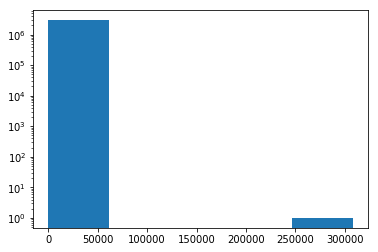

In [16]:
hist = plt.hist(train['item_price'],bins=5,log=True)

In [17]:
train[(train.shop_id==12) & (train['date']=='2013-12-13') & (train.item_price>10000)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
1163157,2013-12-13,11,12,6066,307980.0,1.0,75,2013,12,2013_12
1163087,2013-12-13,11,12,6675,18990.0,1.0,12,2013,12,2013_12
1175137,2013-12-13,11,12,13481,13990.0,1.0,11,2013,12,2013_12


# Bin prices into categories

In [18]:
print 'total train data:',train.shape[0]

bin_edges=[0,10,100,200,500,1000,2500,5000,20000,999999]
#bin_edges=[0,10,100,200,500,999999]

for i,ibin in enumerate(bin_edges):    
    if i==len(bin_edges)-1: 
        print '{}-:'.format(bin_edges[i],bin_edges[i]),
        print train[(train.item_price>=bin_edges[i])].shape[0]
        continue
    else:        
        print '{}-{} :'.format(bin_edges[i],bin_edges[i+1]),
        print train[(train.item_price>=bin_edges[i])&(train.item_price<bin_edges[i+1])].shape[0]

total train data: 2935842
0-10 : 36050
10-100 : 121831
100-200 : 501713
200-500 : 1013478
500-1000 : 596653
1000-2500 : 464970
2500-5000 : 167315
5000-20000 : 27050
20000-999999 : 6781
999999-: 0


In [19]:
def getBins(bin_edges):
    bins =[]
    labels=[]
    for (i,val) in enumerate(bin_edges):
        if i < len(bin_edges)-1: 
            bins.append((bin_edges[i],bin_edges[i+1]))
            labels.append('{}to{}'.format(bin_edges[i],bin_edges[i+1]))
    return bins,labels
bins,labels = getBins(bin_edges)            
print bins,labels

[(0, 10), (10, 100), (100, 200), (200, 500), (500, 1000), (1000, 2500), (2500, 5000), (5000, 20000), (20000, 999999)] ['0to10', '10to100', '100to200', '200to500', '500to1000', '1000to2500', '2500to5000', '5000to20000', '20000to999999']


In [20]:
df_bins = pd.IntervalIndex.from_tuples(bins)
temp = pd.cut(train['item_price'],bins=df_bins,labels=labels)

In [21]:
train['price_range']= temp
train.tail(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M,price_range
2736884,2015-07-28,30,42,22167,299.0,1.0,49,2015,7,2015_7,"(200, 500]"
2551796,2015-03-03,26,25,22167,299.0,1.0,49,2015,3,2015_3,"(200, 500]"
1234935,2013-12-14,11,31,22167,299.0,1.0,49,2013,12,2013_12,"(200, 500]"
1749538,2014-06-29,17,53,22167,299.0,1.0,49,2014,6,2014_6,"(200, 500]"
2041294,2014-10-17,21,26,22167,299.0,1.0,49,2014,10,2014_10,"(200, 500]"
1749537,2014-06-16,17,53,22167,299.0,1.0,49,2014,6,2014_6,"(200, 500]"
2736883,2015-07-09,30,42,22167,299.0,1.0,49,2015,7,2015_7,"(200, 500]"
1860028,2014-07-17,18,18,22167,299.0,1.0,49,2014,7,2014_7,"(200, 500]"
1234934,2013-12-11,11,31,22167,299.0,1.0,49,2013,12,2013_12,"(200, 500]"
2012316,2014-09-26,20,12,22167,299.0,2.0,49,2014,9,2014_9,"(200, 500]"


In [22]:
print 'total train data:',train.shape[0]

bin_edges=[0,10,100,200,500,1000,2500,5000,20000,999999]
Sets.binPrice(bin_edges)

total train data: 2935842

Counting based on the defined bins:

0-10 : 36050
10-100 : 121831
100-200 : 501713
200-500 : 1013478
500-1000 : 596653
1000-2500 : 464970
2500-5000 : 167315
5000-20000 : 27050
20000-999999 : 6781
999999-: 0

Adding new column: price_range to sales_train.


In [23]:
data['sales_train'].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M,price_range
1972631,2014-09-01,20,54,0,58.0,1.0,40,2014,9,2014_9,"(10, 100]"
2069405,2014-10-20,21,55,1,4490.0,1.0,76,2014,10,2014_10,"(2500, 5000]"
1552547,2014-04-04,15,55,1,4490.0,1.0,76,2014,4,2014_4,"(2500, 5000]"
1815466,2014-07-06,18,55,1,4490.0,1.0,76,2014,7,2014_7,"(2500, 5000]"
1906676,2014-08-04,19,55,1,4490.0,1.0,76,2014,8,2014_8,"(2500, 5000]"
